<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Android_Games_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import HTML, display

def set_background(color):    
    script = (
        "var cell = this.closest('.jp-CodeCell');"
        "var editor = cell.querySelector('.jp-Editor');"
        "editor.style.background='{}';"
        "this.parentNode.removeChild(this)"
    ).format(color)
    
    display(HTML('<img src onerror="{}" style="display:none">'.format(script)))

set_background('black')

### Importing the necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
print("All the necessary packages have been imported successfully!")

All the necessary packages have been imported successfully!


### Loading the dataset

In [ ]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/android-games.csv'
df = pd.read_csv(url,error_bad_lines=False)

### Displaying the dataset

In [ ]:
df.head(10)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0 M,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0 M,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0 M,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False
5,6,Call of Duty®: Mobile - Season 4: Spurned & Bu...,13572148,100.0 M,4,2.0,4.0,0.0,GAME ACTION,10501443,1274162,517273,268489,1010778,False
6,7,Among Us,11936964,100.0 M,3,1.8,5.6,0.0,GAME ACTION,5954262,1041297,853099,719378,3368926,False
7,8,Temple Run 2,9633929,500.0 M,4,0.3,0.8,0.0,GAME ACTION,6579369,991341,614643,349003,1099571,False
8,9,PUBG MOBILE LITE,7578630,100.0 M,4,1.0,2.5,0.0,GAME ACTION,5382545,500696,351523,238986,1104879,False
9,10,Gangstar Vegas: World of Crime,6268377,100.0 M,4,0.4,1.0,0.0,GAME ACTION,4509647,605510,319332,167792,666094,False


### Dataset scrutinization

In [ ]:
r,c = df.shape
print("Number of columns in the dataset  = ",c)
print("Number of rows in the dataset     = ",r)

Number of columns in the dataset  =  15
Number of rows in the dataset     =  1730


### Checking for missing values

In [ ]:
print("Are there any missing values in the dataset ?",df.isna().sum().any())

Are there any missing values in the dataset ? False


In [ ]:
print("Displaying columnwise null count\n")
print("Column Name " + " Null values")
print("----------- " + " -----------")
print(df.isna().sum())

Displaying columnwise null count

Column Name  Null values
-----------  -----------
rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64


Since the dataset has no null values it is safe to be processed without any anomalies

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


From the dataframe information displayed here, we can see that column 'installs' is having datatype as object. This is because of the 'M' signifying how many millions. But this should be converted to numerical data for computation. So, the **data needs to be preprocessed**. 

### Data Processing

In [ ]:
# stripping off the bad characters from the numeric intended columns
df['installs'] = df['installs'].str.strip(' M')
df['installs'] = df['installs'].str.strip(' k')
df

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725,96,زوايا - لعبة ستحرك زوايا عقلك,112408,1.0,4,0.9,1.8,0.0,GAME WORD,101036,3607,3237,1229,3297,False
1726,97,Bible Word Puzzle - Free Bible Word Games,111595,1.0,4,0.9,2.3,0.0,GAME WORD,88950,14856,4297,1385,2103,False
1727,98,Scrabble® GO - New Word Game,110723,10.0,4,0.9,1.9,0.0,GAME WORD,64184,18332,9385,6688,12132,False
1728,99,Word Nut: Word Puzzle Games & Crosswords,109530,5.0,4,1.9,4.1,0.0,GAME WORD,99987,4766,1469,953,2353,False


In [ ]:
#converting the object data into numeric data (floating point numbers)
df[['installs']] = df[['installs']].apply(pd.to_numeric)
df.head()

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   float64
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(4), int64(8), object(2)
memory usage: 191.0+ KB


### Displaying a multicategorical data

In [ ]:
df['category'].unique()

array(['GAME ACTION', 'GAME ADVENTURE', 'GAME ARCADE', 'GAME BOARD',
       'GAME CARD', 'GAME CASINO', 'GAME CASUAL', 'GAME EDUCATIONAL',
       'GAME MUSIC', 'GAME PUZZLE', 'GAME RACING', 'GAME ROLE PLAYING',
       'GAME SIMULATION', 'GAME SPORTS', 'GAME STRATEGY', 'GAME TRIVIA',
       'GAME WORD'], dtype=object)

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
rank,1730,NaN,NaN,NaN,50.3867,28.9367,1,25,50,75,100
title,1730,1675,Solitaire,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total ratings,1730,NaN,NaN,NaN,1.06433e+06,3.42925e+06,32993,175999,428606,883797,8.62731e+07
installs,1730,NaN,NaN,NaN,33.6803,74.4145,1,5,10,50,1000
average rating,1730,NaN,NaN,NaN,3.90809,0.290973,2,4,4,4,4
growth (30 days),1730,NaN,NaN,NaN,321.736,6018.91,0,0.1,0.5,1.7,227106
growth (60 days),1730,NaN,NaN,NaN,122.555,2253.89,0,0.2,1,3.3,69441.4
price,1730,NaN,NaN,NaN,0.0109422,0.214987,0,0,0,0,7.49
category,1730,17,GAME CARD,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5 star ratings,1730,NaN,NaN,NaN,762231,2.53866e+06,13975,127730,296434,619836,6.35468e+07


### Data Visualization

In [ ]:
### plotting the ratings of the top 20 games
df_t30 = df.head(30)
df_t30

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False
2,3,Mobile Legends: Bang Bang,26663595,100.0,4,1.5,3.2,0.0,GAME ACTION,18777988,1812094,1050600,713912,4308998,False
3,4,Brawl Stars,17971552,100.0,4,1.4,4.4,0.0,GAME ACTION,13018610,1552950,774012,406184,2219794,False
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,14464235,500.0,4,0.8,1.5,0.0,GAME ACTION,9827328,2124154,1047741,380670,1084340,False
5,6,Call of Duty®: Mobile - Season 4: Spurned & Bu...,13572148,100.0,4,2.0,4.0,0.0,GAME ACTION,10501443,1274162,517273,268489,1010778,False
6,7,Among Us,11936964,100.0,3,1.8,5.6,0.0,GAME ACTION,5954262,1041297,853099,719378,3368926,False
7,8,Temple Run 2,9633929,500.0,4,0.3,0.8,0.0,GAME ACTION,6579369,991341,614643,349003,1099571,False
8,9,PUBG MOBILE LITE,7578630,100.0,4,1.0,2.5,0.0,GAME ACTION,5382545,500696,351523,238986,1104879,False
9,10,Gangstar Vegas: World of Crime,6268377,100.0,4,0.4,1.0,0.0,GAME ACTION,4509647,605510,319332,167792,666094,False


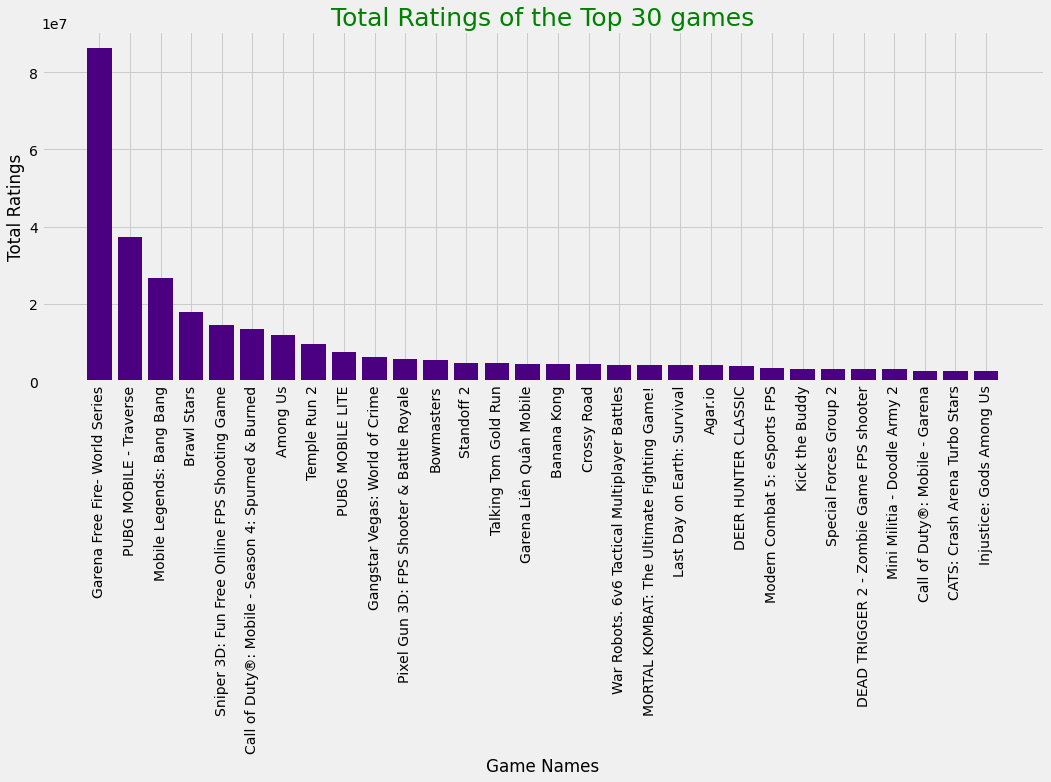

In [ ]:
plt.figure(figsize=(16,6))
plt.bar(df_t30['title'],df_t30['total ratings'],color='indigo')
plt.plot()
plt.xlabel("Game Names")
plt.xticks(rotation="90")
plt.ylabel("Total Ratings")
plt.title("Total Ratings of the Top 30 games", fontsize=25,color='green')
plt.show()